In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate as interp
import utm

In [2]:
mag_path = 'data/mag_data.csv'
gps_path = 'data/gps.csv'

# magnetic coil data acquisition sampling rate
sample_rate = int(1e4)

mag_data = pd.read_csv(mag_path)
mag_times = mag_data['Times (s)'].to_numpy()
mag_ch1_voltages = mag_data['Ch 1 Voltage (V)'].to_numpy()
mag_ch2_voltages = mag_data['Ch 2 Voltage (V)'].to_numpy()
mag_ch1_ac_voltages = mag_ch1_voltages-np.mean(mag_ch1_voltages)
mag_ch2_ac_voltages = mag_ch2_voltages-np.mean(mag_ch2_voltages)
mag_ch1_rms_voltages = [np.sqrt(np.mean(np.square(mag_ch1_ac_voltages[i*sample_rate:(i+1)*sample_rate]))).tolist() for i in range(30)]
mag_ch2_rms_voltages = [np.sqrt(np.mean(np.square(mag_ch2_ac_voltages[i*sample_rate:(i+1)*sample_rate]))).tolist() for i in range(30)]

gps_data = pd.read_csv(gps_path)
gps_times = gps_data['Times (s)'].to_numpy()
gps_lat = gps_data['Latitude'].to_numpy()
gps_lon = gps_data['Longitude'].to_numpy()

# Conversion from GPS global latitude and longitude to UTM latitude and longitude (in [m])
utm_lat, utm_lon, zone_num, zone_letter = utm.from_latlon(gps_lat, gps_lon)

Plotting of GPS coordinates

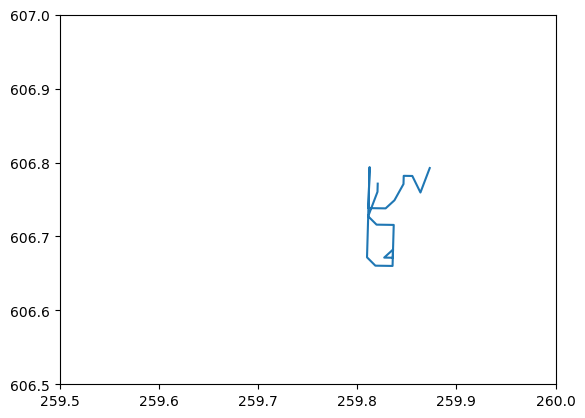

In [3]:
plt.plot(utm_lat%1000, utm_lon%1000)
plt.ylim(606.5,607)
plt.xlim(259.5,260)
plt.show()

In [5]:
# Interpolate mag data to gps coords
mag_ch1_voltages_interp = interp.interp1d(mag_times[::sample_rate], mag_ch1_rms_voltages, kind='cubic', fill_value='extrapolate')
mag_ch2_voltages_interp = interp.interp1d(mag_times[::sample_rate], mag_ch2_rms_voltages, kind='cubic', fill_value='extrapolate')
mag_ch1_voltages_at_gps_coords = mag_ch1_voltages_interp(gps_times)
mag_ch2_voltages_at_gps_coords = mag_ch2_voltages_interp(gps_times)

# print(mag_voltages_at_gps_coords)
# print(list(zip(gps_lat, gps_lon)))

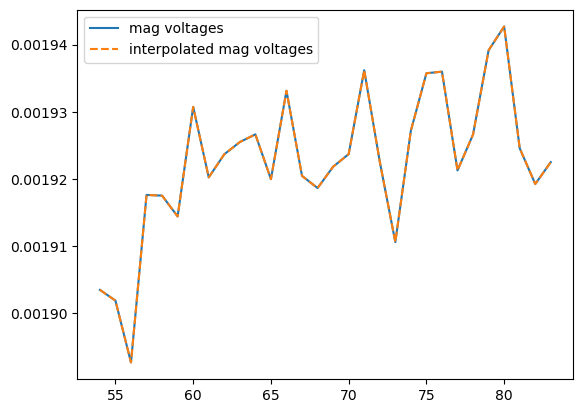

In [13]:
#plt.scatter(gps_times, utm_lat%1000, label='latitude')
plt.plot(mag_times[::sample_rate], mag_ch1_rms_voltages, label='mag voltages')
plt.plot(gps_times[:30], mag_ch1_voltages_at_gps_coords[:30], label='interpolated mag voltages', linestyle='--')
plt.legend()
plt.show()